# EXPLORATORY DATA ANALYSIS ON A DATASET

#### Objective:
The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.
Dataset:
1.	LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.
2.	AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.
3.	FM - May indicate "Fetal Movements" detected by the monitor.
4.	UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.
5.	DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.
6.	DS - May represent "Decelerations Short" or decelerations of brief duration.
7.	DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.
8.	ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.
9.	MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.
10.	ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.
11.	MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.


## Task 1.	Data Cleaning and Preparation:

In [1]:
#load the libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Task 1 a) Load the dataset into a DataFrame
ctg_data = pd.read_csv("Cardiotocographic.csv")
ctg_data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [3]:
# Information of the table
ctg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


<Axes: >

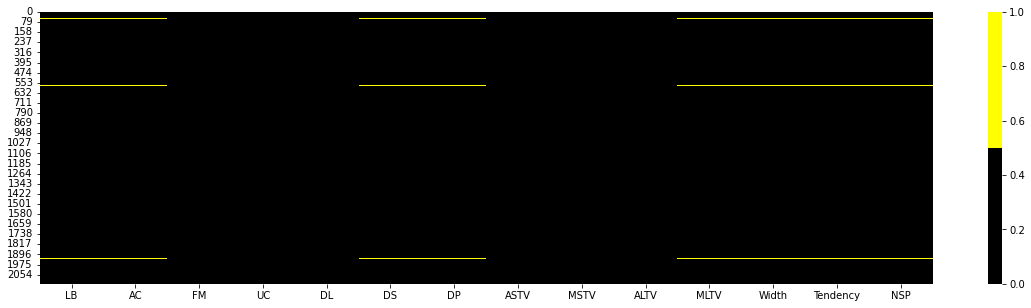

In [4]:
# Visualizing missing values
cols = ctg_data.columns 
colours = ['black', 'yellow'] # specify the colours - yellow is missing. black is not missing.
plt.figure(figsize=(20,5))
sns.heatmap(ctg_data[cols].isnull(),
            cmap=sns.color_palette(colours), cbar = True)

In [5]:
# From above heatmap it is clear that the missing values are around the same rows
# Displaying all missing values

ctg_data[ctg_data.isnull().any(axis=1)]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
50,NaN,NaN,0.000000,0.008086,0.000000,NaN,NaN,29.000000,1.300000,0.000000,NaN,NaN,NaN,NaN
116,NaN,0.038567,0.000000,0.006993,0.002331,NaN,NaN,26.000000,4.300000,0.532872,NaN,NaN,NaN,NaN
126,NaN,NaN,0.000000,0.004380,0.000000,NaN,NaN,69.000000,0.300000,21.000000,NaN,NaN,NaN,NaN
201,NaN,NaN,0.016393,0.000000,0.000000,NaN,NaN,56.000000,0.500000,12.000000,NaN,NaN,NaN,NaN
566,NaN,NaN,0.000000,0.004115,0.005487,NaN,NaN,43.000000,2.500000,0.000000,NaN,NaN,NaN,NaN
574,NaN,NaN,0.000000,0.002611,0.002611,NaN,NaN,34.000000,4.900000,0.000000,NaN,NaN,NaN,NaN
603,NaN,NaN,0.006519,0.001304,0.001304,NaN,NaN,73.000000,0.700000,0.000000,NaN,NaN,NaN,NaN
935,NaN,NaN,0.000000,0.005495,0.001374,NaN,NaN,30.000000,1.251793,0.000000,NaN,NaN,NaN,NaN
936,NaN,NaN,0.000000,0.007802,0.000000,NaN,NaN,33.000000,1.000000,0.000000,NaN,NaN,NaN,NaN
1013,NaN,NaN,0.000000,0.003861,0.000000,NaN,NaN,34.000000,1.000000,0.000000,NaN,NaN,NaN,NaN


In [6]:
# Percentage of rows with missing values

total_rows = ctg_data.shape[0]
na_rows = len(ctg_data[ctg_data.isnull().any(axis=1)])

na_rows_percentage = (na_rows/total_rows)*100
na_rows_percentage

0.9877704609595485

In [7]:
# Task 1- b) Handle missing values 
# Dropping the NAN rows as its less than 1% of total table data and there are multiple missing values in a row
ctg_data.dropna(inplace=True)
ctg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2105 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2105 non-null   float64
 2   FM        2105 non-null   float64
 3   UC        2105 non-null   float64
 4   DL        2105 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2105 non-null   float64
 8   MSTV      2105 non-null   float64
 9   ALTV      2105 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 246.7 KB


*Task 1 c) Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).*

**No inconsistencies all data are stored in float format considering the decimal places**

In [8]:
# Task 1 d) Detect and treat outliers if necessary

outliers_size=0
for column in ctg_data.columns:
    Q1 = ctg_data[column].quantile(0.25)
    Q3 = ctg_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    for x in ctg_data[column]:
        if (x<lower) or (x > upper):
            outliers_size=outliers_size+1
    print("The number of outliers in ", column,": ",outliers_size)
    outliers_size=0

The number of outliers in  LB :  10
The number of outliers in  AC :  39
The number of outliers in  FM :  343
The number of outliers in  UC :  13
The number of outliers in  DL :  124
The number of outliers in  DS :  120
The number of outliers in  DP :  284
The number of outliers in  ASTV :  10
The number of outliers in  MSTV :  78
The number of outliers in  ALTV :  317
The number of outliers in  MLTV :  81
The number of outliers in  Width :  10
The number of outliers in  Tendency :  10
The number of outliers in  NSP :  559


**The overall outliers are very high in number in some columns. Removing them is not wise choice. Other approach is to check with gynecologist the reason for extreme values. Faulty equipment or real scenarios.**

In [9]:
# Rounding of the NSP values to get N = 1, S = 2, P =3

ctg_data['NSP'].round(0) 

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: NSP, Length: 2105, dtype: float64

In [10]:
# Changing the datatype of NSP column to int

ctg_data['NSP'] = ctg_data['NSP'].astype(int)
ctg_data['NSP'].value_counts()

NSP
 1    1594
 2     286
 3     171
 0      44
-1       6
 5       4
Name: count, dtype: int64

In [11]:
# Delete rows where the 'NSP' is 0 , -1 and 5 (We wants Normal = 1, Suspect = 2, Pathologic =3)

indexAge = ctg_data[(ctg_data['NSP'] == 0) | (ctg_data['NSP'] == -1) | (ctg_data['NSP'] == 5)].index
ctg_data.drop(indexAge, inplace=True)

In [12]:
# Delete column Width and Tendency because this column is details of histogram drawn from FHR 

ctg_data.drop(columns=['Width','Tendency'], inplace=True)

## Task 2. Statistical Summary

In [13]:
# Task 2 a)Provide a statistical summary for each variable in the dataset, 
# including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

ctg_data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,NSP
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,133.329068,0.003203,0.010124,0.004386,0.001910,0.000003,0.000178,46.991493,1.360932,10.408773,8.314699,1.306192
std,11.190351,0.004308,0.068735,0.003364,0.003341,0.000143,0.000848,18.769958,1.178327,21.425826,7.700969,0.615931
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,1.000000
25%,126.000000,0.000000,0.000000,0.001798,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,1.000000
50%,133.000000,0.001592,0.000000,0.004478,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,1.000000
75%,140.307470,0.005629,0.002509,0.006573,0.003320,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,3.000000


In [14]:
# interquartile-range

for column in ctg_data.columns:
    q1=ctg_data[column].quantile(0.25)
    q3=ctg_data[column].quantile(0.75)
    IQR=q3-q1
    print("The IQR for column ",column,": ",IQR)

The IQR for column  LB :  14.307469900323923
The IQR for column  AC :  0.00562905
The IQR for column  FM :  0.002508904
The IQR for column  UC :  0.0047748915
The IQR for column  DL :  0.0033195044999999998
The IQR for column  DS :  0.0
The IQR for column  DP :  0.0
The IQR for column  ASTV :  29.0
The IQR for column  MSTV :  1.0
The IQR for column  ALTV :  11.0
The IQR for column  MLTV :  6.300000000000001
The IQR for column  NSP :  0.0


Mode:  ModeResult(mode=array([0.]), count=array([1932]))


<Axes: >

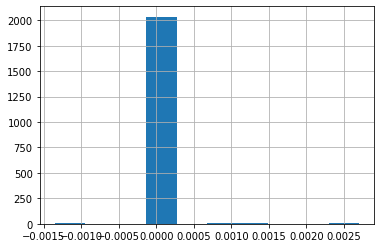

In [15]:
print("Mode: ",st.mode(ctg_data["DS"]))
ctg_data['DS'].hist()

Mode:  ModeResult(mode=array([0.]), count=array([1770]))


<Axes: >

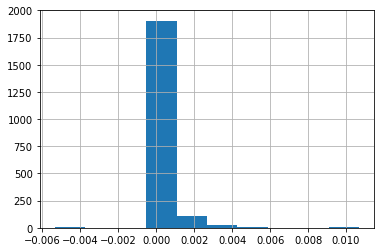

In [16]:
print("Mode: ",st.mode(ctg_data["DP"]))
ctg_data['DP'].hist()

Mode:  ModeResult(mode=array([1]), count=array([1594]))


<Axes: >

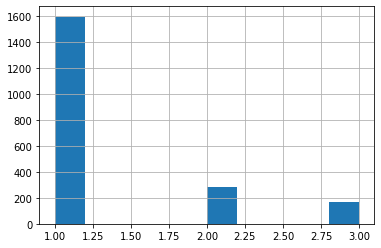

In [17]:
print("Mode: ",st.mode(ctg_data["NSP"]))
ctg_data['NSP'].hist()

Task 2 b)Highlight any interesting findings from this summary

Most of the columns IQR value is zero means there is no variability in the middle 50% of your data, but the center of the
distribution can be anywhere.

## Task 3.	Data Visualization

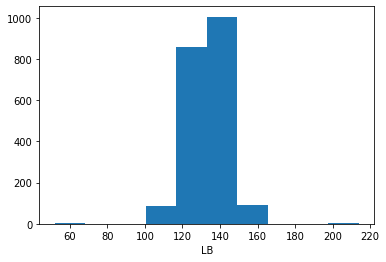

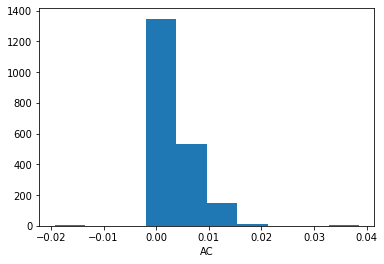

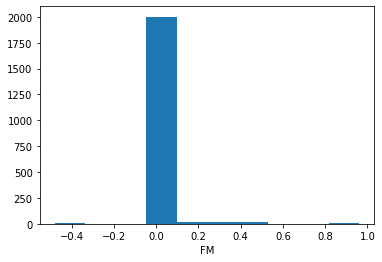

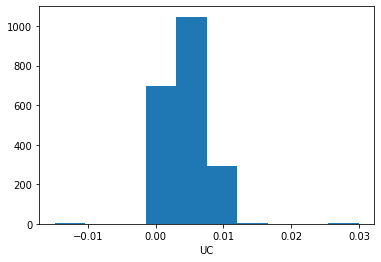

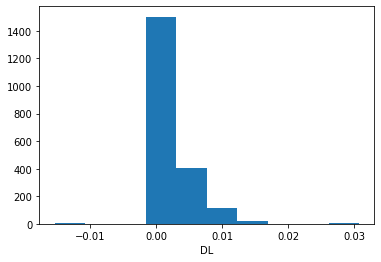

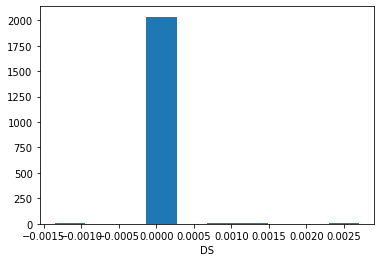

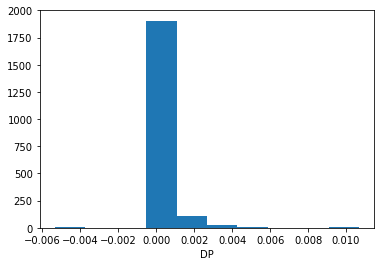

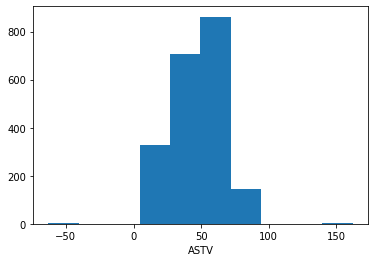

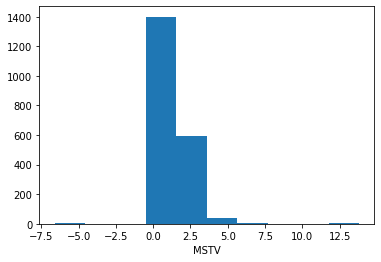

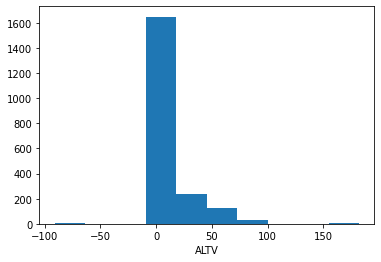

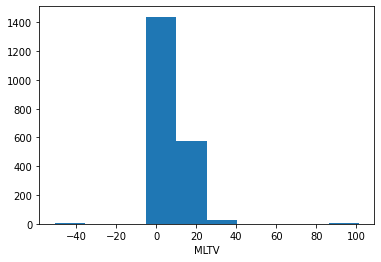

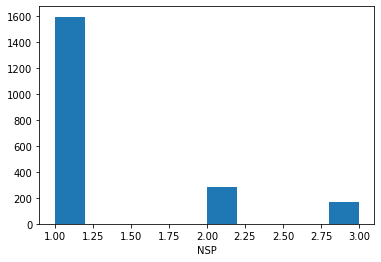

In [18]:
#Task 3 a) Create histograms or boxplots to visualize the distributions of various numerical variables.
# #Box plot

for column in ctg_data.columns:
    plt.hist(ctg_data[column])
    plt.xlabel(column)
    plt.show()

**Task 3 b) Use bar charts or pie charts to display the frequency of categories for categorical variables**

There are no categorical data

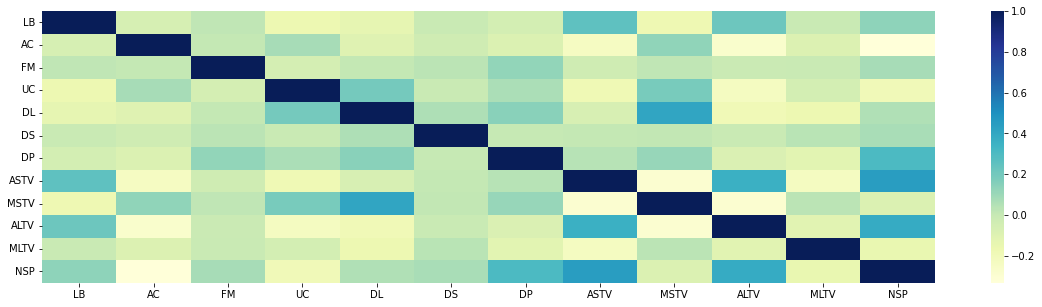

In [19]:
# Task 3 c) Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

plt.figure(figsize=(20,5))
  
# plotting correlation heatmap 
dataplot = sns.heatmap(ctg_data.corr(), cmap="YlGnBu") 
  
# displaying heatmap 
plt.show() 

The darker the color between two columns higher is the poitive correlation between them.

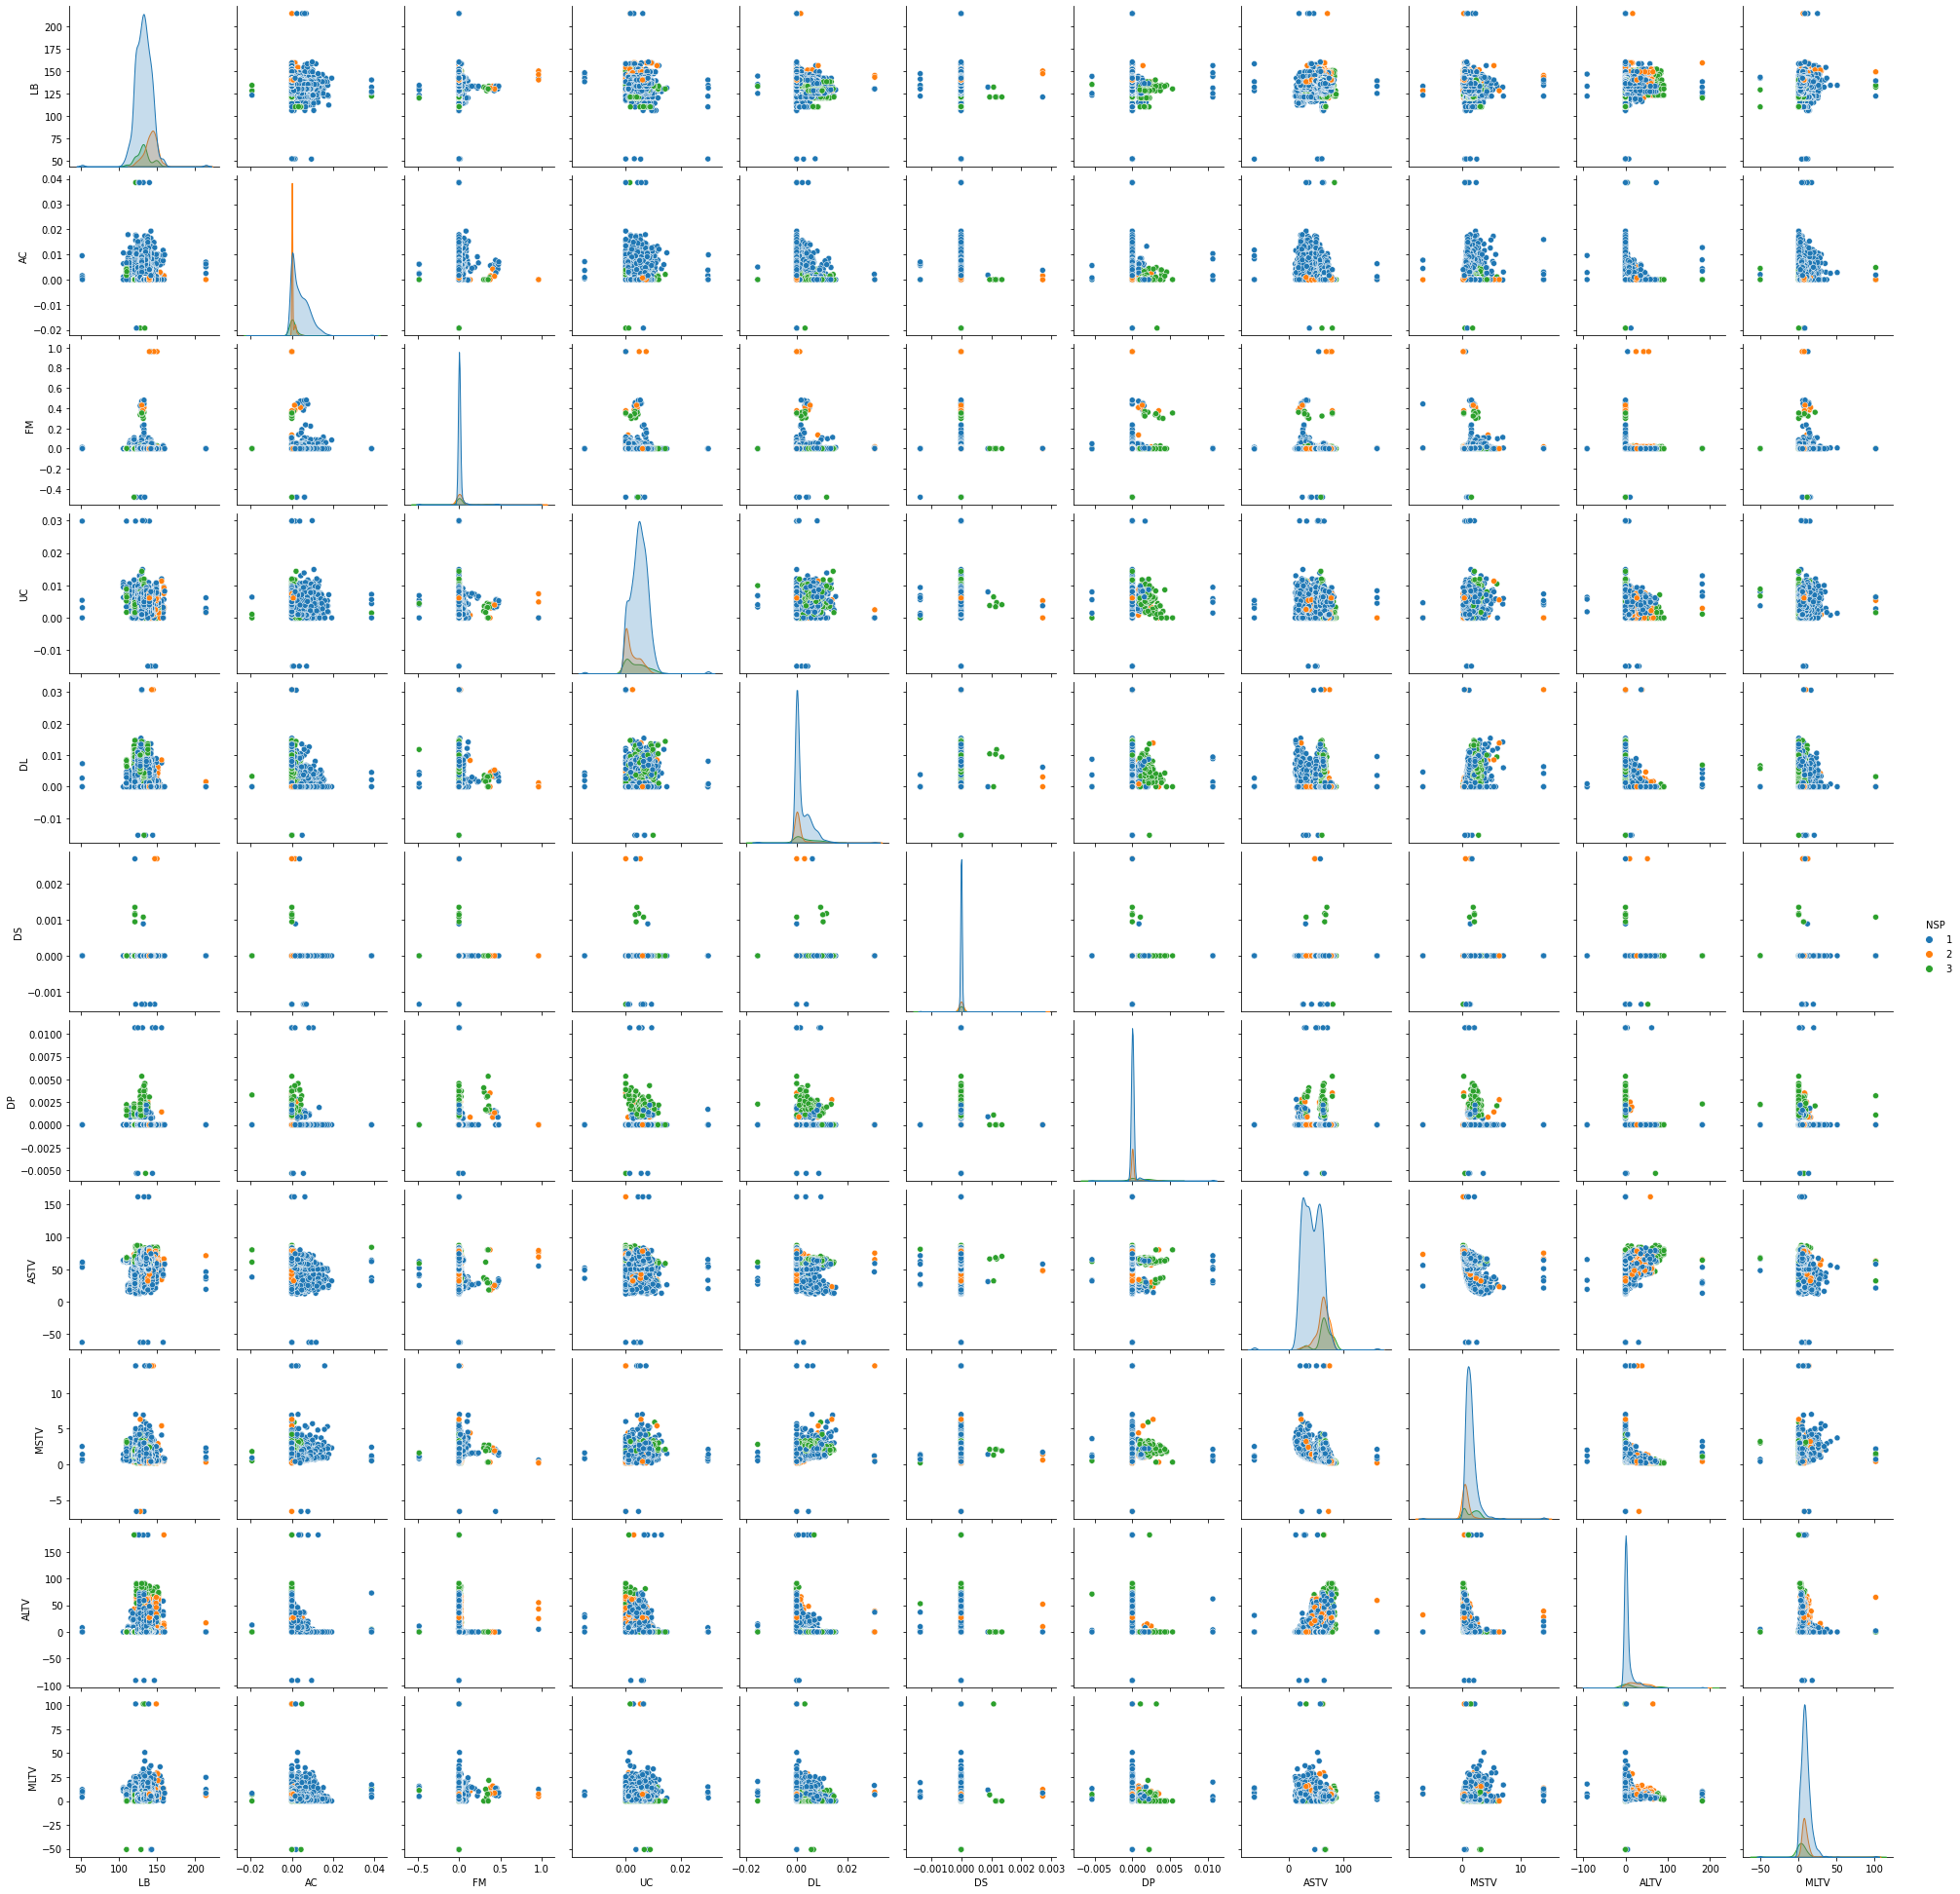

In [20]:
#Task 3 d) Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

#plt.figure(figsize=(20,5))
# pairplot
sns.pairplot(ctg_data, hue='NSP', palette=["C0", "C1", "C2"])
# to show
plt.show()

## Task 4.	Pattern Recognition and Insights:

Some variables, such as the number of 'DP' , 'ASTV' and 'ALTV', correlate positively with NSP; while others, such as 'AC' correlate negatively with NSP. Some of these correlations are substantial but there are no variables with absolute correlation coefficient above 0.5, indicating that no single feature alone can provide good predictions.

## 5.	Conclusion

Applying the different algorithm need to find which is best suitable for model building.